In [1]:
import pandas as pd
import seaborn as sb

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
import scipy.cluster.hierarchy as sch

In [6]:
df = pd.read_csv("wine.csv")

In [7]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df["Type"].unique()

array([1, 2, 3], dtype=int64)

In [9]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<AxesSubplot:>

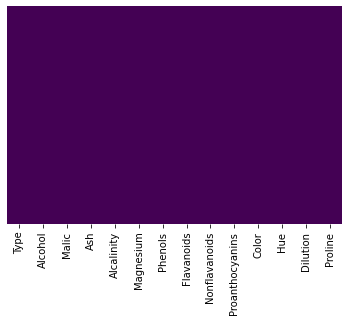

In [10]:
# checking missing values
sb.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

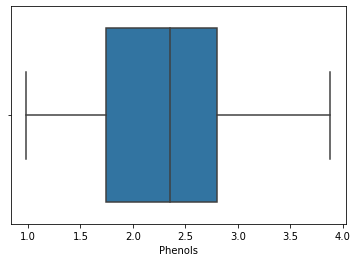

In [11]:
sb.boxplot(data=df,x="Phenols")
plt.show()

# All the data is normalized

In [12]:
# To Scale the data 

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scale_df = MinMaxScaler()

In [15]:
norm_df = scale_df.fit_transform(df)

In [16]:
df = pd.DataFrame(norm_df,columns=df.columns)

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


Applying PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
# Apply first on all features see the variance take only those who give high variance
pca_df = PCA(n_components = None)

In [21]:
# fit the model
pca_df.fit(df)

PCA()

In [22]:
variance = pca_df.explained_variance_ratio_

In [23]:
variance

array([0.51003634, 0.14853339, 0.06702619, 0.06257153, 0.05009893,
       0.03837954, 0.02882988, 0.01963591, 0.01828022, 0.01769633,
       0.01483498, 0.01075837, 0.00837412, 0.00494429])

In [24]:
# The first three take max variance so i take only first three
Dim_reduction = PCA(n_components=3)

In [25]:
# fit and train the model together
reducted_df = Dim_reduction.fit_transform(df)

In [26]:
Dim_reduction.components_

array([[ 0.6293282 , -0.11538334,  0.18694541, -0.00605884,  0.14898351,
        -0.06546653, -0.29907772, -0.32479936,  0.23920701, -0.18419798,
         0.08078851, -0.20189805, -0.37170465, -0.2400427 ],
       [ 0.01993018, -0.54791647, -0.2344791 , -0.16351603,  0.07620456,
        -0.18485315, -0.06219328,  0.01015402, -0.02206778, -0.02268177,
        -0.52014852,  0.24253447,  0.22768572, -0.43761144],
       [ 0.03341574, -0.08752348,  0.49369469,  0.39251169,  0.47666736,
         0.01701346,  0.26790425,  0.20701857,  0.23278396,  0.24925826,
        -0.02422129, -0.1201589 ,  0.30702977, -0.16025723]])

Text(0, 0.5, 'Variance Ratio')

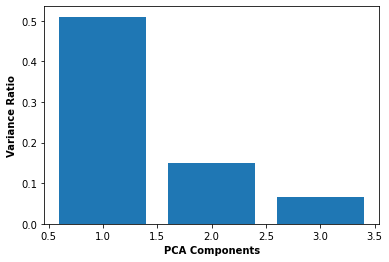

In [27]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(Dim_reduction.explained_variance_ratio_)+1), Dim_reduction.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

inferences

First p_component describe 51% explained variance.

Second component describe atmost 14% explained variance.

Third component describe around 6% explained variance

In [28]:
import numpy as np

Text(0, 0.5, 'Cumulative Explained Variance')

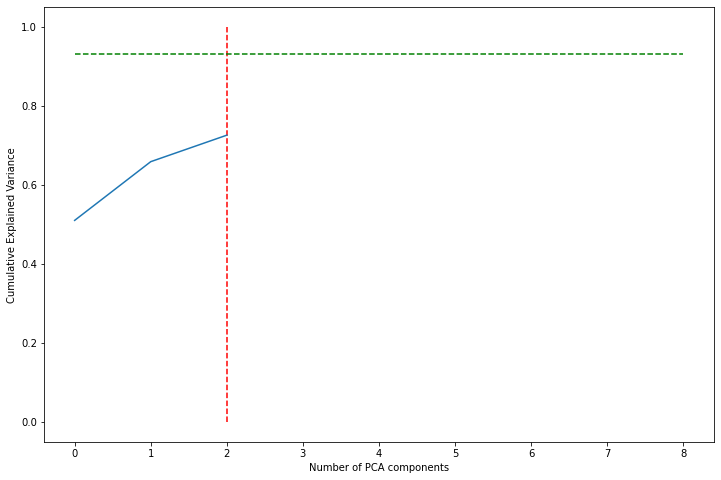

In [29]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(Dim_reduction.explained_variance_ratio_))
plt.vlines(x=2, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

Inferences

Above the Scree plot show around 80% Explained variance by the first 3 principal components,we will using these components for futher analysis

In [30]:
# Now create the dataframe for the principal components

In [31]:
df_pca = pd.DataFrame(data=reducted_df,columns=['Pc1','Pc2','pc3'])

In [32]:
df_pca.head()

,Pc1,Pc2,pc3
0,-0.847604,-0.243146,0.029752
1,-0.678651,-0.005712,-0.283970
2,-0.700372,-0.183868,0.197457
3,-0.936076,-0.566967,0.093919
4,-0.454077,-0.063348,0.286092


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace

plotting the heatmap to see whether is there still dependence or not

In [33]:
# plt.figure(figsize = (8,6))        
# ax = sb.heatmap(df_pca.corr(),annot = True)
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:xlabel='pc3', ylabel='Pc2'>

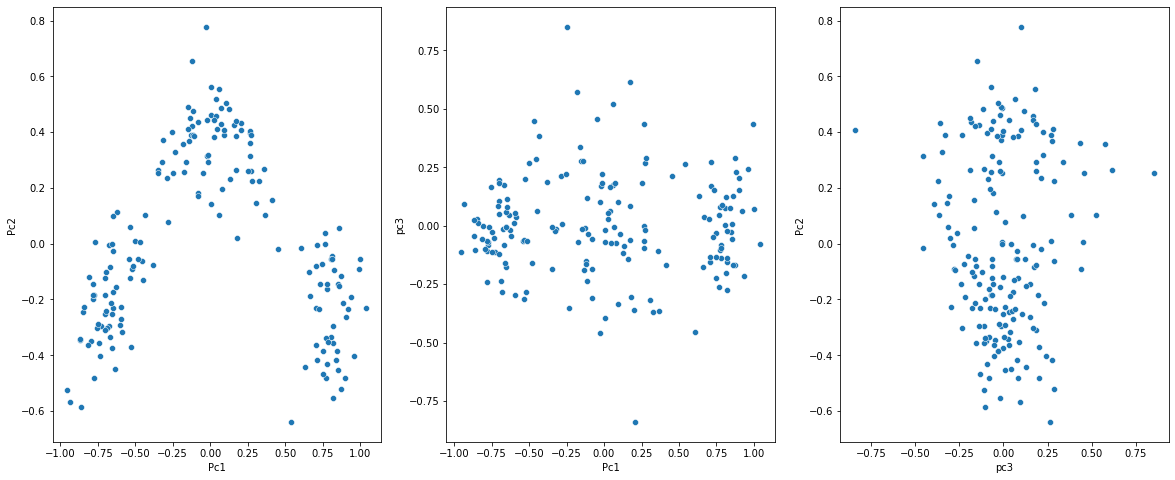

In [34]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sb.scatterplot(data=df_pca, x='Pc1', y='Pc2',palette="blue")
plt.subplot(1,3,2)
sb.scatterplot(data=df_pca, x='Pc1', y='pc3',palette="green")
plt.subplot(1,3,3)
sb.scatterplot(data=df_pca, x='pc3', y='Pc2',palette="blue")

Outlier Analysis and Treatment

There are 2 types of outliers and we will treat outliers as it can skew our dataset

Statistical

Domain specific

Text(0.5, 0, 'PC Components')

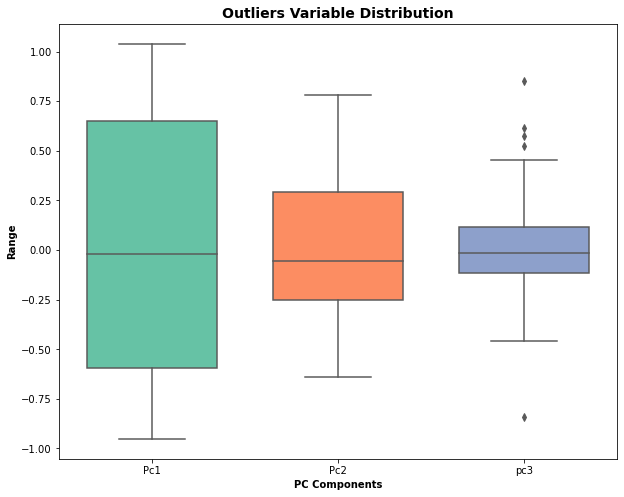

In [35]:
# Outlier Analysis 

outliers = ['Pc1','Pc2','pc3']
plt.rcParams['figure.figsize'] = [10,8]
sb.boxplot(data = df_pca[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

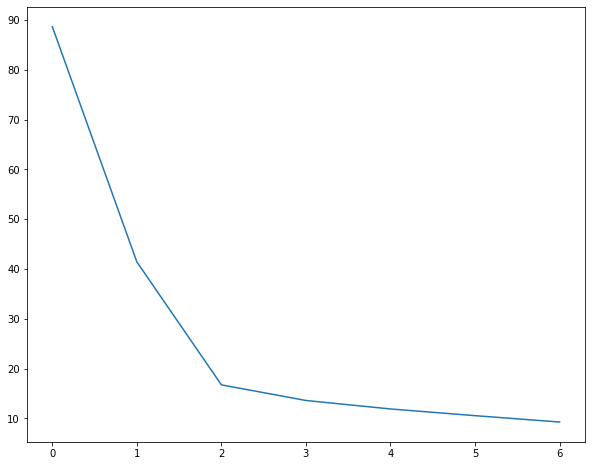

In [36]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters,random_state= 100)
    model_clus.fit(df_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

Inference

Looking at the above elbow curve it looks good to proceed with either 4 or 5 clusters

# Silhouette Analysis

silhouette score=p−q/max(p,q)

p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters  = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4964482877288067
For n_clusters=3, the silhouette score is 0.5742903318722895
For n_clusters=4, the silhouette score is 0.4856183597440081
For n_clusters=5, the silhouette score is 0.47396328118601494
For n_clusters=6, the silhouette score is 0.36951806966374207
For n_clusters=7, the silhouette score is 0.313268326514088
For n_clusters=8, the silhouette score is 0.2956946666746746


In [39]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, max_iter=50, random_state= 100)
cluster4.fit(df_pca)


KMeans(max_iter=50, n_clusters=4, random_state=100)

In [40]:
# Cluster labels

cluster4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 2, 0, 3, 3, 0,
       0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [41]:
# Assign the label

df_pca['Clusters'] = cluster4.labels_
df_pca.head()

,Pc1,Pc2,pc3,Clusters
0,-0.847604,-0.243146,0.029752,1
1,-0.678651,-0.005712,-0.283970,1
2,-0.700372,-0.183868,0.197457,1
3,-0.936076,-0.566967,0.093919,1
4,-0.454077,-0.063348,0.286092,1


In [42]:
# Number of classes in each cluster

df_pca['Clusters'].value_counts()

1    59
2    49
3    35
0    35
Name: Clusters, dtype: int64

Kmeans_clusters 1 is has highest data points as compared to others

<AxesSubplot:xlabel='Pc1', ylabel='pc3'>

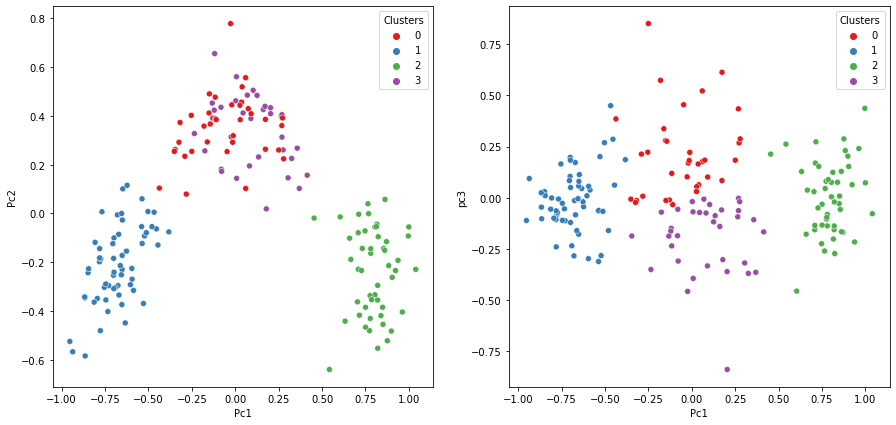

In [43]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,7))

sb.scatterplot(x='Pc1',y='Pc2',hue='Clusters',legend='full',palette="Set1",data=df_pca,ax=axes[0])
sb.scatterplot(x='Pc1',y='pc3',hue='Clusters',legend='full',palette="Set1",data=df_pca,ax=axes[1])

Inference:
In plot 1, it seems lot of intra-distance between the cluster elements, which is not a good sign

# Hierarchical clustering

AgglormerativeClustering

In [44]:
df_pca.head()

,Pc1,Pc2,pc3,Clusters
0,-0.847604,-0.243146,0.029752,1
1,-0.678651,-0.005712,-0.283970,1
2,-0.700372,-0.183868,0.197457,1
3,-0.936076,-0.566967,0.093919,1
4,-0.454077,-0.063348,0.286092,1


In [45]:
df_hc = df_pca.iloc[:,:3]

In [46]:
df_hc

,Pc1,Pc2,pc3
0,-0.847604,-0.243146,0.029752
1,-0.678651,-0.005712,-0.283970
2,-0.700372,-0.183868,0.197457
3,-0.936076,-0.566967,0.093919
4,-0.454077,-0.063348,0.286092
...,...,...,...
173,0.898916,-0.482112,0.203259
174,0.785427,-0.353231,0.088418
175,0.820658,-0.552469,-0.020750
176,0.777268,-0.430255,-0.095511


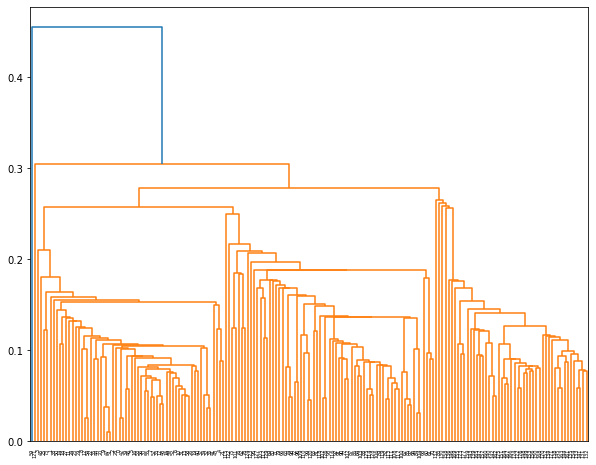

In [47]:
hc = sch.dendrogram(sch.linkage(df_hc,method='single',metric='euclidean'))

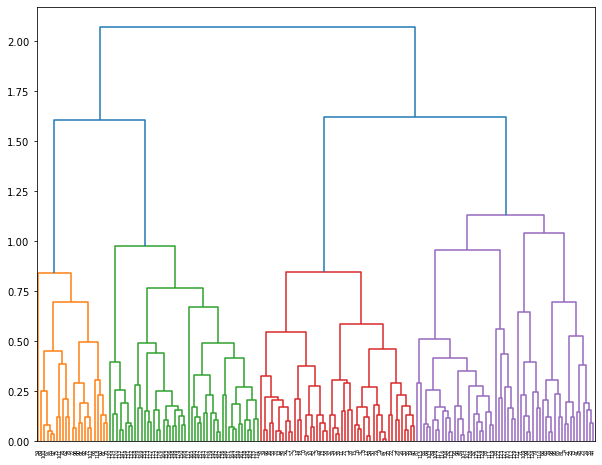

In [48]:
hc = sch.dendrogram(sch.linkage(df_hc,method='complete',metric='euclidean'))

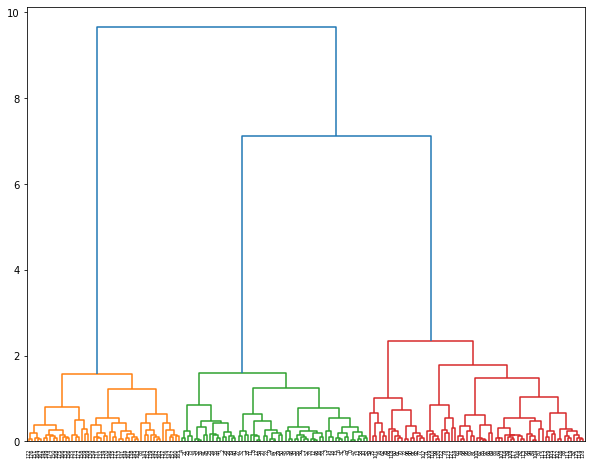

In [49]:
hc = sch.dendrogram(sch.linkage(df_hc,method='ward',metric='euclidean'))

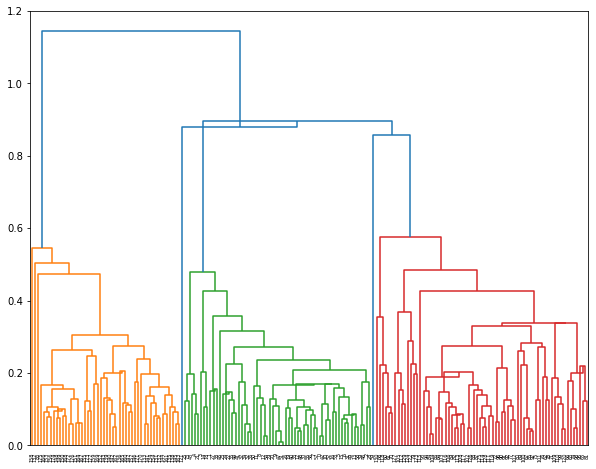

In [50]:
hc = sch.dendrogram(sch.linkage(df_hc,method='centroid',metric='euclidean'))

In [51]:
hierarchy_clustering = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage = 'ward')

In [52]:
clusters = hierarchy_clustering.fit_predict(df)

In [53]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 3,
       1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [54]:
df_hc["cluster_labels"] = hierarchy_clustering.labels_

In [55]:
df_hc.head()

,Pc1,Pc2,pc3,cluster_labels
0,-0.847604,-0.243146,0.029752,2
1,-0.678651,-0.005712,-0.283970,2
2,-0.700372,-0.183868,0.197457,2
3,-0.936076,-0.566967,0.093919,2
4,-0.454077,-0.063348,0.286092,2


In [88]:
df_hc["cluster_labels"].value_counts()

2    59
0    48
1    44
3    27
Name: cluster_labels, dtype: int64

cluster_label 2 is highest as compared to others

<AxesSubplot:xlabel='cluster_labels', ylabel='Pc1'>

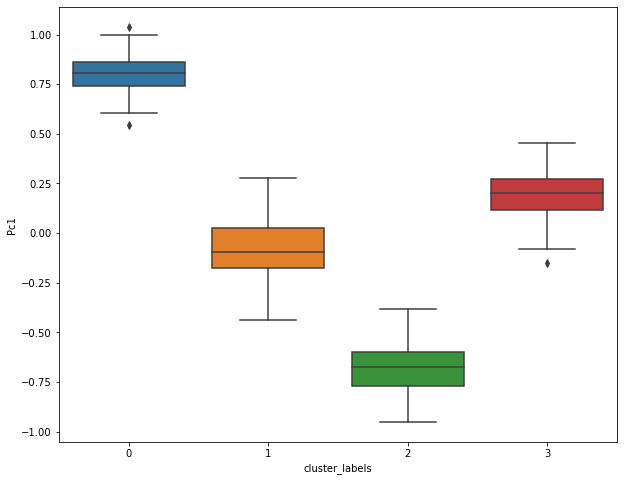

In [56]:
# Plot Clusterid vs Pc1

sb.boxplot(x='cluster_labels', y='Pc1', data=df_hc)

<AxesSubplot:xlabel='cluster_labels', ylabel='Pc2'>

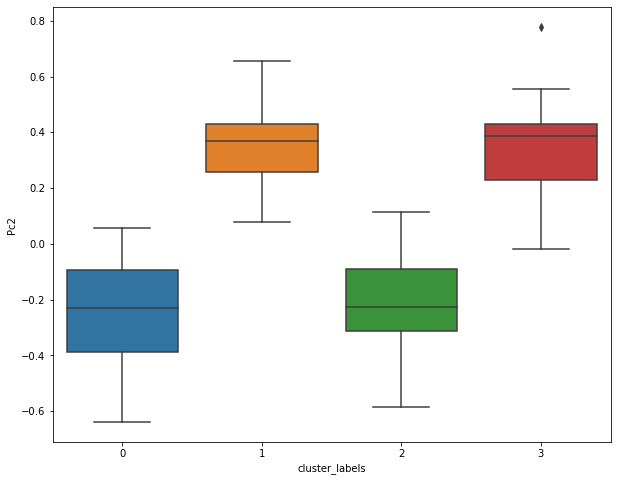

In [57]:

sb.boxplot(x='cluster_labels', y='Pc2', data=df_hc)

<AxesSubplot:xlabel='cluster_labels', ylabel='pc3'>

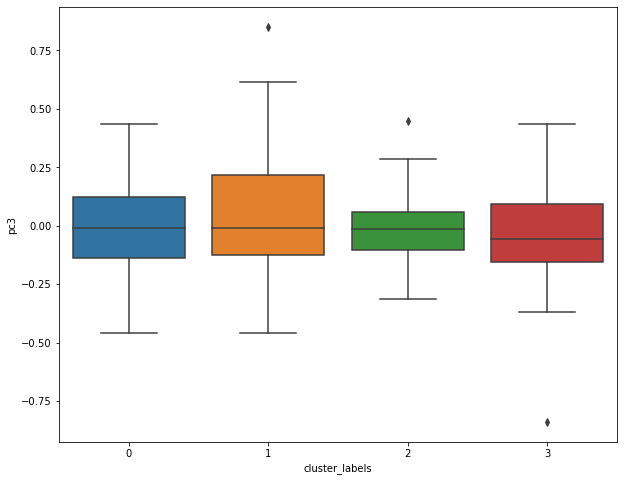

In [58]:

sb.boxplot(x='cluster_labels', y='pc3', data=df_hc)

# comparison with orginal data

In [61]:
inverse_df = scale_df.inverse_transform(df)

In [62]:
type(inverse_df)

numpy.ndarray

In [68]:
orgnal_df = pd.DataFrame(inverse_df,columns=df.columns)

In [69]:
orgnal_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [70]:
orgnal_df["clustered_lbs"] = hierarchy_clustering.labels_

In [72]:
orgnal_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clustered_lbs
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


<AxesSubplot:xlabel='clustered_lbs', ylabel='Alcohol'>

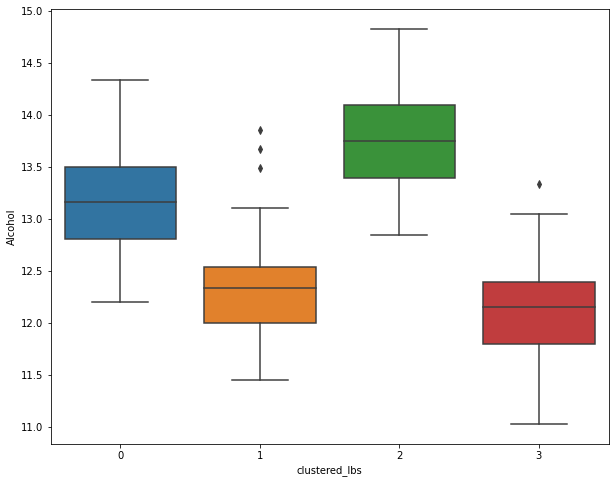

In [74]:
sb.boxplot(x='clustered_lbs', y='Alcohol', data=orgnal_df)

In [87]:
orgnal_df["clustered_lbs"].value_counts()

2    59
0    48
1    44
3    27
Name: clustered_lbs, dtype: int64

inferences

cluster_label 2 is frequent as compared to others

In [ ]:
# plt.scatter(df[clusters == 0, 0], df[clusters == 0, 1], label = 'Type 1')
# plt.scatter(df[clusters == 1, 0], df[clusters == 1, 1], label = 'Type 2')
# plt.scatter(df[clusters == 2, 0], df[clusters == 2, 1], label = 'Type 3')
# plt.scatter(df[clusters == 3, 0], df[clusters == 3, 1], label = 'Type 4')
# plt.title('Clusters')
# plt.show()

# KMeans on original data

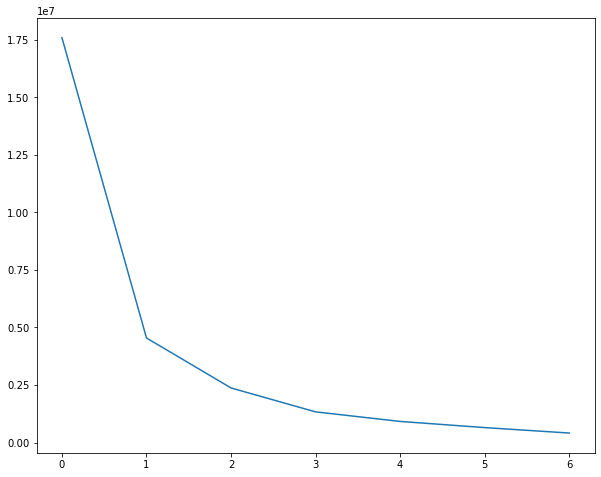

In [75]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters,random_state= 100)
    model_clus.fit(orgnal_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [76]:
kmeans = KMeans(n_clusters=4,max_iter=50, random_state= 100)

In [79]:
kmeans.fit(orgnal_df)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [81]:
kmeans.labels_

array([0, 0, 2, 2, 3, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 3, 3,
       0, 0, 3, 3, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 3, 3, 0, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 0, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 1, 0, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3,
       3, 1])

In [82]:
four_col = orgnal_df.iloc[:,1:4]

In [84]:
four_col["kmean_cluster"] = kmeans.labels_

In [85]:
four_col.head()

,Alcohol,Malic,Ash,kmean_cluster
0,14.23,1.71,2.43,0
1,13.20,1.78,2.14,0
2,13.16,2.36,2.67,2
3,14.37,1.95,2.50,2
4,13.24,2.59,2.87,3


In [86]:
four_col["kmean_cluster"].value_counts()

1    66
3    57
0    32
2    23
Name: kmean_cluster, dtype: int64

inference

Cluster 0 is higest as compared to others

# Conclusion

Both have same no. of cluster but distribution is different